In [ ]:
%load_ext autoreload
%autoreload 2

# Classification Explorer

> Fill in a module description here

In [ ]:
#| default_exp classification.explorer

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#|export
from fastai.vision.all import *
import polvo as pv

/home/lgvaz/miniconda3/envs/allpolvo/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#|export
class DataExplorer(pv.classification.DataExplorer):
    def __init__(self, x_tl, y_tl): 
        id2label = y_tl.vocab.__getitem__
        label2id = {l: i for i, l in enumerate(y_tl.vocab)}.__getitem__
        super().__init__(y_tl, x_tl.__getitem__, id2label, label2id)
        
    @classmethod
    def from_datasets(cls, dss):
        return cls(dss.tls[0], dss.tls[1])

In [ ]:
data_dir = untar_data(URLs.MNIST_TINY)

In [ ]:
images = pv.get_image_files(data_dir, folders=['train', 'valid'])
splits = GrandparentSplitter()(images)
dss = Datasets(images, [[PILImage.create], [parent_label, Categorize()]], splits=splits)

In [ ]:
exp = DataExplorer.from_datasets(dss)

In [ ]:
exp.most_common()

,label_id,label,item_idx,n_samples
0,1,7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]",716
1,0,3,"[353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, ...]",692


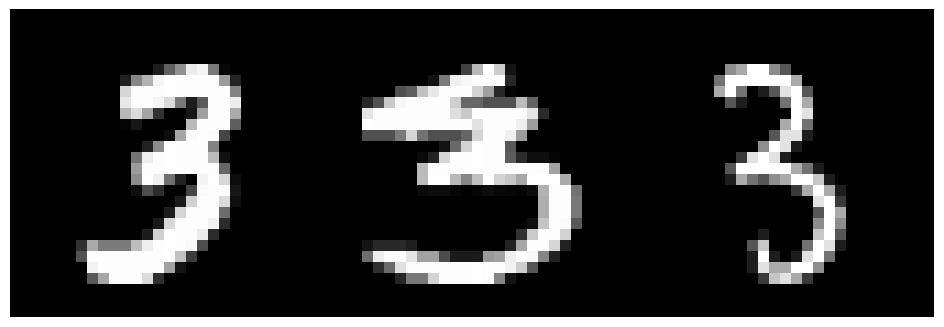

(<Figure size 1400x400 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
exp.show_label_id(0, slice(0, 3))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()